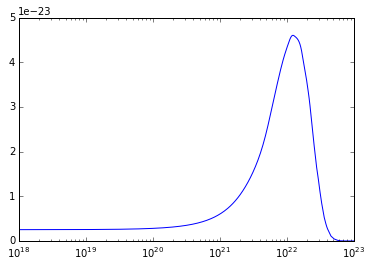

0.998455038784
(3, 2, 3)
[0 1]
(3, 2, 3)
[0 1]


In [38]:
%matplotlib inline

import numpy as np
import scipy.optimize as scop
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import quad, dblquad
from scipy import stats

Nsamples = 200000
resolution = 100

def density(x,y,scale_radius,  gamma): #NFW density profile
	solar_radius = 8.25
	R = np.sqrt(1 -2.*y*x + x*x)#R / solar radius
	return pow(R,-gamma)*pow((1 + R*solar_radius/scale_radius)/(1+solar_radius/scale_radius),gamma-3)

def J_factor(scale_radius,local_density,gamma):
	#integrating density^2 from x=0 to inf; x is line of sight distance/solarradius
	#theta = np.zeros((7,7))
	temp = np.zeros((7,7))
	for i in range(7):
		for j in range(7):
			y = np.cos(.5*(1+j)*np.pi/180.)*np.cos(.5*(1+i)*np.pi/180.)
			integrand = lambda x: density(x,y,scale_radius,gamma)**2
			ans, err = integrate.quad(integrand, 0,np.inf)
			temp[i,j] = ans
	J = temp.mean()	
	kpctocm = 3.08568e21
	deltaomega = (7.*np.pi/180.)**2
	return  deltaomega*J*8.25*kpctocm*local_density*local_density
	


    
def density_spher_sym(x,theta,scale_radius,gamma):
    #x is the los distance relative to solar radius; theta is the polar angle from the los direction in degrees
    solar_radius = 8.25
    R = np.sqrt(1 - 2*np.cos(theta)*x + x*x)
    return R**-gamma * ((1 + R*solar_radius/scale_radius)/(1+solar_radius/scale_radius))**(gamma-3)

def J_per_sr(theta,scale_radius,gamma):
    integrand = lambda x: density_spher_sym(x, theta, scale_radius, gamma)**2
    ans, err = integrate.quad(integrand,0,np.inf)
    return ans

# def J_per_sr_2(scale_radius,gamma):
#     integrand = lambda x,theta: np.sin(theta)*density_spher_sym(x, theta, scale_radius, gamma)**2
#     ans, err = integrate.dblquad(integrand,0,np.inf,0,3.5 )
#     return ans

# def J_per_sr_2(scale_radius,gamma):
#     return dblquad(lambda x,theta: np.sin(theta)*density_spher_sym(x,theta,scale_radius,gamma)**2,0,3.5*np.pi/180., lambda x: 0, lambda x: np.inf)


def J_per_theta(theta,scale_radius,gamma):
    integrand = lambda x: density_spher_sym(x, theta, scale_radius, gamma)**2
    ans, err = integrate.quad(integrand,0,np.inf)
    return ans*np.sin(theta)

# N = 1000    
# theta_array = np.linspace(0.0,3.5*np.pi/180.,num=N)

# Jpt = np.zeros(N)

# for i in range(1,N):
#     Jpt[i] = J_per_theta(theta_array[i] ,20.,1.1)

# J_test = np.trapz(Jpt,x=theta_array)*2*np.pi    

# print J_test*8.25* 3.08568e21 * 0.28**2

# plt.plot(theta_array, Jpt)
# plt.show()
    
    

    
    
# N = 1000    
# theta_array = np.linspace(0.0,3.7*np.pi/180.,num=N)

# Jpt = np.zeros(N)

# for i in range(1,N):
#     Jpt[i] = J_per_theta(theta_array[i] ,20.,1.1)

# J_test = np.trapz(Jpt,theta_array)*2*np.pi    

# print J_test*8.25* 3.08568e21 * 0.28**2    
    
    
# integrand = lambda theta: J_per_theta(theta,20.,1.1) 
# ans, err = integrate.quad(integrand,.00000001,3.5*np.pi/180.)

# print ans*2*np.pi*8.25* 3.08568e21

# #print J_per_sr_2(20,1.1)

# # print J_per_sr(0,20,1.1)





# print J_factor(20,0.28,1.1)


# print density_spher_sym(8,2,20,1.1)

# print density_spher_sym(0.5,0,20,1.1)


rho = np.random.normal(0.28,0.08,100000)

J = 2e23*rho**2

J_kde = stats.gaussian_kde(J)

J_plot = np.logspace(18,23,400)

plt.plot(J_plot,J_kde(J_plot))
plt.xscale('log')
plt.show()


norm = np.trapz(J_kde(J_plot),J_plot)
print norm


a = np.array([0,1])

c = np.tile(a,(3,3,1))
d= c.reshape(3,2,3)

print d.shape
print d[0,:,0]

b = np.tile(a[np.newaxis,:,np.newaxis],(3,1,3))

print b.shape

print b[0,:,0]